In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from utils.dataloader import bin_avg, retrieve_data, dataloader, \
      drop_settlement_dup, load_data, frame_to_numpy, create_rolling_window_dataset

In [376]:
train_loss_long = np.load('results/train_loss.npy_long_ttm_put_sm_True_ws_5_h_1_2_7_4_fixed.npy')
val_loss_long = np.load('results/val_loss.npy_long_ttm_put_sm_True_ws_5_h_12_7_4_fixed.npy')

train_loss_short = np.load('results/train_loss.npy_short_ttm_put_sm_True_ws_5_h_1_2_7_4_fixed.npy')
val_loss_short = np.load('results/val_loss.npy_short_ttm_put_sm_True_ws_5_h_12_7_4_fixed.npy')

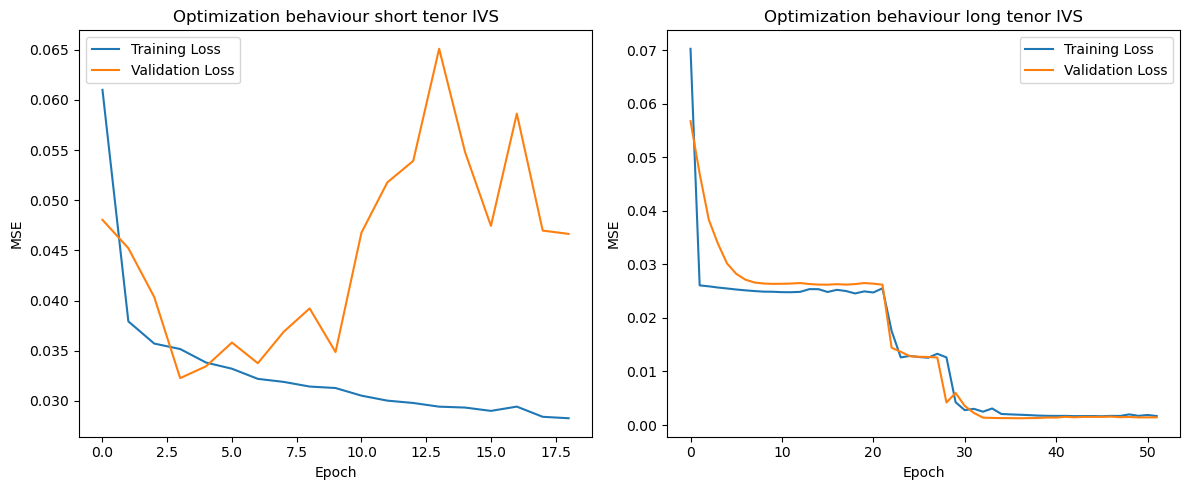

In [377]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # Adjust figsize as needed

# Plot for short tenor IVS
axs[0].plot(train_loss_short, label='Training Loss')
axs[0].plot(val_loss_short, label='Validation Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('MSE')
axs[0].set_title('Optimization behaviour short tenor IVS')
axs[0].legend()

# Plot for long tenor IVS
axs[1].plot(train_loss_long, label='Training Loss')
axs[1].plot(val_loss_long, label='Validation Loss')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('MSE')
axs[1].set_title('Optimization behaviour long tenor IVS')
axs[1].legend()

# Save and show
plt.tight_layout()
plt.savefig('figures/ttm_epoch_side_by_side.png')
plt.show()

In [10]:
result_file = "put_smooth_True_ws_5_h_1_2_7_4_fixed.npy"

In [11]:
# Lets make the graph that depicts IVRMSe and Roos for long vs short term maturity
ivrmse_long = np.load('results/test_long_ttm/ivrmse/' + result_file)
ivrmse_short = np.load('results/test_short_ttm/ivrmse/' + result_file)
ivrmse_h_long = np.load('results/test_long_ttm/ivrmse_h/' + result_file)
ivrmse_h_short = np.load('results/test_short_ttm/ivrmse_h/' + result_file)
roos_long = np.load('results/test_long_ttm/r_oos/' + result_file)
roos_short = np.load('results/test_short_ttm/r_oos/' + result_file)
roos_h_long = np.load('results/test_long_ttm/r_oos_h/' + result_file)
roos_h_short = np.load('results/test_short_ttm/r_oos_h/' + result_file)

surface_long = np.load('results/test_long_ttm/surface/' + result_file)
surface_short = np.load('results/test_short_ttm/surface/' + result_file)
surface_pred_long = np.load('results/test_long_ttm/surface_pred/' + result_file)
surface_pred_short = np.load('results/test_short_ttm/surface_pred/' + result_file)

df_test = pd.read_csv('data/final/evaluation/test_set.csv')
df = df_test.drop_duplicates(subset='date', keep='last')
T = ivrmse_h_short.shape[0]
dates = df['date'].iloc[-T:].reset_index(drop=True)

In [409]:
print(ivrmse_long, ivrmse_short)
print(roos_long, roos_short)

0.09278924581681876 0.27285582039845513
0.048286673215482634 0.04628646498790723


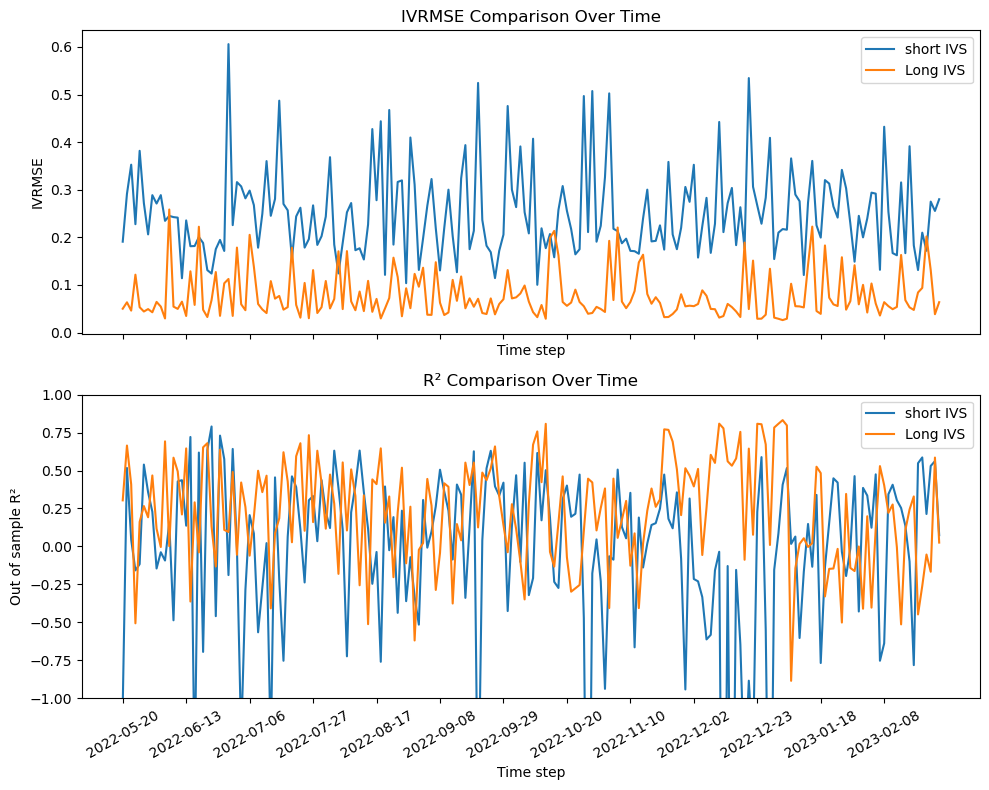

In [436]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)  # sharex aligns the x-axis

axs[0].plot(dates, ivrmse_h_short, label="short IVS")
ivrmse_h_long = ivrmse_h_long[-ivrmse_h_short.shape[0]:]
axs[0].plot(dates, ivrmse_h_long, label="Long IVS")
axs[0].set_xlabel("Time step")
axs[0].set_xticks(ticks=range(0, len(dates), 15), labels=dates[::15], rotation=30)
axs[0].set_ylabel("IVRMSE")
axs[0].set_title("IVRMSE Comparison Over Time")
axs[0].legend()

axs[1].plot(dates, roos_h_short, label="short IVS")
roos_h_long = roos_h_long[-roos_h_short.shape[0]:]
axs[1].plot(dates, roos_h_long, label="Long IVS")
axs[1].set_xlabel("Time step")
axs[1].set_xticks(ticks=range(0, len(dates), 15), labels=dates[::15], rotation=30)
axs[1].set_ylabel("Out of sample R\u00b2")
axs[1].set_title("R\u00b2 Comparison Over Time")
axs[1].set_ylim(-1, 1)
axs[1].legend()

plt.tight_layout()
plt.show()

In [47]:
ivrmse_h_long = np.load('results/validation_long_ttm/r_oos_h/call_smooth_True_ws_5_h_1_2_7_4.npy')
ivrmse_h_short = np.load('results/validation_short_ttm/r_oos_h/call_smooth_True_ws_21_h_1_VIX_VVIX_SKEW_RVOL_TMS_CRS_EPU_ADS.npy')
print(ivrmse_h_long)
print(ivrmse_h_short)
ivrmse_h_long = ivrmse_h_long[-ivrmse_h_short.shape[0]:]
time = np.arange(ivrmse_h_short.shape[0])

[[ 0.34902949]
 [-0.92511983]
 [-1.240535  ]
 [-1.00225747]
 [-1.1217183 ]
 [-1.41721174]
 [-1.3974916 ]
 [-0.82238352]
 [-0.91953276]
 [-0.85577038]
 [-1.10616054]
 [-1.1591418 ]
 [-1.08556481]
 [-0.98784892]
 [-0.95294658]
 [-1.02636807]
 [-0.92670102]
 [-1.07738903]
 [-0.97106575]
 [-1.39460206]
 [-1.1815282 ]
 [-0.94138094]
 [-1.16103461]
 [-1.27853787]
 [-0.97552131]
 [-1.03371741]
 [-1.02012423]
 [-0.93309372]
 [-1.13269618]
 [-1.30602046]
 [-0.78595935]
 [-0.78193376]
 [-0.97747308]
 [-0.96450068]
 [-0.97005877]
 [-0.88561615]
 [-0.93862354]
 [-0.91956534]
 [-0.95047444]
 [-1.36084327]
 [-0.89128707]
 [-1.33657215]
 [-1.18694729]
 [-1.01058727]
 [-1.27379611]
 [-0.83830107]
 [-0.73238565]
 [-0.84900732]
 [-0.83827758]
 [-0.82349301]
 [-1.07378748]
 [-0.87455504]
 [-0.81798738]
 [-1.39772922]
 [-1.3715997 ]
 [-1.1852155 ]
 [-0.97111377]
 [-1.21894625]
 [-1.18418858]
 [-1.12720334]
 [-1.01296482]
 [-0.94757912]
 [-1.02137554]
 [-1.01174885]
 [-0.97553193]
 [-1.06412213]
 [-1.08547

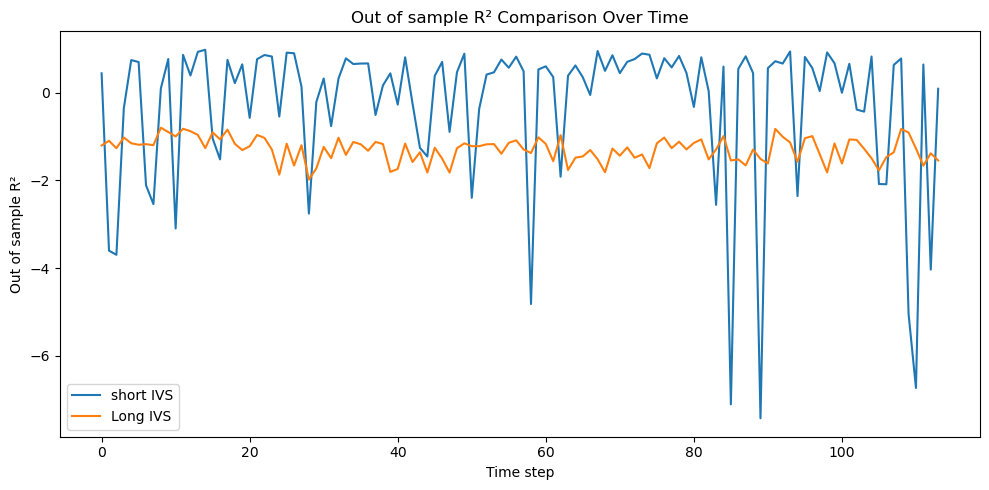

In [48]:
plt.figure(figsize=(10, 5))
plt.plot(time, ivrmse_h_short, label="short IVS")
plt.plot(time, ivrmse_h_long, label="Long IVS")
plt.xlabel("Time step")
r2 = "Out of sample R\u00b2"
plt.ylabel(f"{r2}")
plt.title(f"{r2} Comparison Over Time")
plt.legend()
plt.tight_layout()
plt.show()

In [208]:
# Fix the r squared

y_pred = np.load('results/validation_long_ttm/surface_pred/call_smooth_True_ws_5_h_1_2_7_4.npy')
y_true = np.load('results/validation_long_ttm/surface/call_smooth_True_ws_5_h_1_2_7_4.npy')

In [50]:
print(y_pred.shape, y_true.shape)

(218, 9, 5, 1) (218, 9, 5, 1)


In [432]:
def calculate_r_oos_mask(y_true, y_pred, all_points=False):

    mask = tf.cast(y_true > 0, tf.double)
    if not all_points:
        ss_res = tf.reduce_sum(tf.square(y_true - y_pred) * mask)

        numerator = tf.reduce_sum(y_true * mask, axis=0)  # shape: [H, W]

        # Denominator: count of non-zero entries per grid cell over time
        denominator = tf.reduce_sum(mask, axis=0)  # shape: [H, W]
        mean_IV = numerator / denominator 

        # mean_IV = tf.reduce_mean(y_true, axis = 0) 
        
        ss_tot = tf.reduce_sum(tf.square(y_true - mean_IV) * mask)
        r2 = 1 - ss_res/ss_tot
    else:
        ss_res = tf.reduce_sum(tf.square(y_true - y_pred)* mask, axis=[1, 2])
        numerator = tf.reduce_sum(y_true * mask, axis=0)  # shape: [H, W]
        # Denominator: count of non-zero entries per grid cell over time
        denominator = tf.reduce_sum(mask, axis=0)  # shape: [H, W]
        mean_IV = numerator / denominator 
        ss_tot = tf.reduce_sum(tf.square(y_true - mean_IV) * mask, axis=[1, 2])
        r2 = 1 - ss_res/ss_tot
    return r2.numpy()

In [26]:
def calculate_r_oos_mask(y_true, y_pred, y_train, all_points=False):
    mask = tf.cast(y_true > 0, tf.double)
    train_mask = tf.cast(y_train > 0, tf.double)

    # Compute the baseline mean IV from the training set across time (axis=0)
    numerator = tf.reduce_sum(y_train * train_mask)  # shape: [H, W]
    denominator = tf.reduce_sum(train_mask)          # shape: [H, W]
    mean_IV = numerator / denominator  # shape: [H, W]

    if not all_points:
        ss_res = tf.reduce_sum(tf.square(y_true - y_pred) * mask)
        ss_tot = tf.reduce_sum(tf.square(y_true - mean_IV) * mask)
        r2 = 1 - ss_res / ss_tot
    else:
        ss_res = tf.reduce_sum(tf.square(y_true - y_pred) * mask, axis=[1, 2])
        ss_tot = tf.reduce_sum(tf.square(y_true - mean_IV) * mask, axis=[1, 2])
        r2 = 1 - ss_res / ss_tot

    return r2.numpy()


In [457]:
print(result_file)

put_smooth_True_ws_5_h_1_2_7_4_fixed.npy


In [2]:
temporary_map = 'data/final/binned'

x_iv_train, x_cov_train, target_train, x_iv_val, x_cov_val, \
            target_val, x_iv_test, x_cov_test, target_test, IV_val, IV_test = \
                dataloader('long_ttm', 'put', True, False, [], 5, 1, folder_path=temporary_map)

In [3]:
y_train_long = target_train

In [5]:
temporary_map = 'data/final/binned'

x_iv_train, x_cov_train, target_train2, x_iv_val, x_cov_val, \
            target_val, x_iv_test, x_cov_test, target_test, IV_val, IV_test = \
                dataloader('short_ttm', 'put', True, False, [], 5, 1, folder_path=temporary_map)

y_train_short = target_train2

In [29]:
print(calculate_r_oos_mask(surface_short, surface_pred_short, y_train_short))
print(calculate_r_oos_mask(surface_long, surface_pred_long, y_train_long))

0.16665319257780664
0.380079100105159


In [ ]:
print(calculate_r_oos_mask(surface_short, surface_pred_short))
print(calculate_r_oos_mask(surface_long, surface_pred_long))

0.04628646498790734
0.048286673215482745


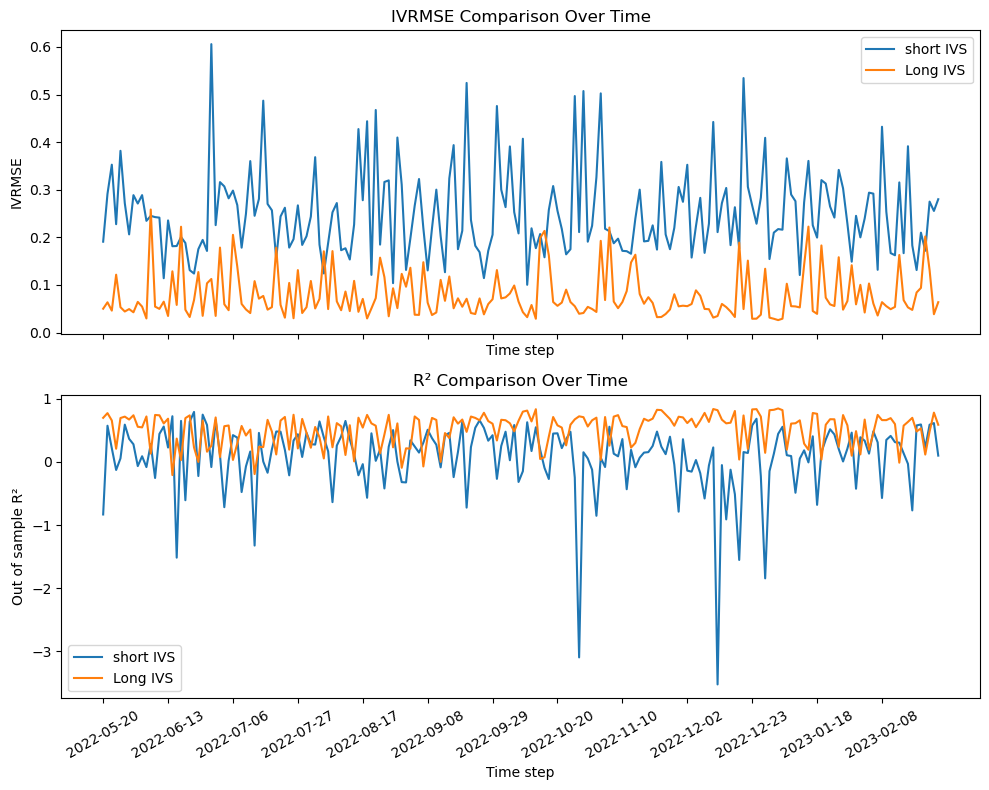

In [32]:
roos_h_short = calculate_r_oos_mask(surface_short, surface_pred_short, y_train_short, all_points=True)
roos_h_long = calculate_r_oos_mask(surface_long, surface_pred_long, y_train_long, all_points=True)

fig, axs = plt.subplots(2, 1, figsize=(10, 8), sharex=True)  # sharex aligns the x-axis

axs[0].plot(dates, ivrmse_h_short, label="short IVS")
ivrmse_h_long = ivrmse_h_long[-ivrmse_h_short.shape[0]:]
axs[0].plot(dates, ivrmse_h_long, label="Long IVS")
axs[0].set_xlabel("Time step")
axs[0].set_xticks(ticks=range(0, len(dates), 15), labels=dates[::15], rotation=30)
axs[0].set_ylabel("IVRMSE")
axs[0].set_title("IVRMSE Comparison Over Time")
axs[0].legend()

axs[1].plot(dates, roos_h_short, label="short IVS")
roos_h_long = roos_h_long[-roos_h_short.shape[0]:]
axs[1].plot(dates, roos_h_long, label="Long IVS")
axs[1].set_xlabel("Time step")
axs[1].set_xticks(ticks=range(0, len(dates), 15), labels=dates[::15], rotation=30)
axs[1].set_ylabel("Out of sample R\u00b2")

axs[1].set_title("R\u00b2 Comparison Over Time")
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
from utils.dataloader import dataloader
from utils import get_config

In [ ]:
config_original = 'config_file.yaml'
config = get_config(config_original)

In [ ]:
print(config)

{'training': {'batch_size': 32, 'seed': 71298, 'patience': 15, 'epsilon': 1e-06, 'random_state': 42, 'epochs': 200, 'lr': 0.001}, 'data': {'run': 'short_ttm', 'option': 'call', 'smooth': True, 'full_train': False, 'window_size': 21, 'h_step': 1, 'covariates': []}, 'model': {'filters': 64, 'kernel_height': 3, 'kernel_width': 3, 'num_layer': 2, 'strides_dim': 1, 'kernel_initializer': 'glorot_uniform', 'recurrent_initializer': 'orthogonal', 'padding': 'same', 'conv_activation': 'tanh', 'recurrent_activation': 'sigmoid', 'note': 'run1'}}


In [ ]:
data_config = config['data']
run = data_config['run']
option_type = data_config["option"]
smooth = data_config["smooth"]
full_train = data_config["full_train"]
covariate_columns = data_config["covariates"]
window_size = data_config['window_size']
h_step = data_config['h_step']

temporary_map = 'data/final/binned'

In [ ]:
x_iv_train, x_cov_train, target_train, x_iv_val, x_cov_val, \
            target_val, x_iv_test, x_cov_test, target_test, IV_val, IV_test = \
                dataloader(run, option_type, smooth, full_train, covariate_columns, window_size, h_step, folder_path=temporary_map)

In [ ]:
print(IV_val.shape, target_val.shape)

(114, 9, 5, 1) (114, 9, 5, 1)


In [ ]:
from utils.dataloader import bin_avg, retrieve_data, dataloader, drop_settlement_dup, load_data, frame_to_numpy, create_rolling_window_dataset

In [ ]:
data_train, data_val, data_test, covar_df = load_data('short_ttm', 'put', ['VVIX'])

In [ ]:
data_val = drop_settlement_dup(data_val)

In [ ]:
moneyness_grid = np.arange(0.80, 1.21, 0.05)

In [ ]:
data_val = bin_avg(data_val, moneyness_grid, train=False )

In [ ]:
print(data_val.head(20))

          date  maturity  moneyness  impl_volatility
0   2021-12-07         1       0.80              NaN
1   2021-12-07         1       0.85              NaN
2   2021-12-07         1       0.90              NaN
3   2021-12-07         1       0.95         0.483243
4   2021-12-07         1       1.00         0.174480
5   2021-12-07         1       1.05         0.391089
6   2021-12-07         1       1.10         0.526888
7   2021-12-07         1       1.15              NaN
8   2021-12-07         1       1.20              NaN
9   2021-12-07         4       0.80              NaN
10  2021-12-07         4       0.85              NaN
11  2021-12-07         4       0.90              NaN
12  2021-12-07         4       0.95         0.121325
13  2021-12-07         4       1.00         0.145437
14  2021-12-07         4       1.05         0.245564
15  2021-12-07         4       1.10         0.357458
16  2021-12-07         4       1.15         0.460268
17  2021-12-07         4       1.20         0.

In [ ]:
data_val['date'] = pd.to_datetime(data_val['date'])
covar_df ['VVIX']
if covar_df is not None:
    data = pd.merge(data_val, covar_df, on='date', how='left')
data = data.dropna()

In [ ]:
IV_val, cov_val = frame_to_numpy(data, ['VVIX'])

In [ ]:
print(np.sum(IV_val, axis=0))

[[[ 2.026512  ]
  [ 7.66366325]
  [ 2.57902533]
  [ 3.58187175]
  [ 0.7568285 ]]

 [[ 8.97537603]
  [11.67258458]
  [ 6.51134142]
  [ 3.87355668]
  [ 2.81117158]]

 [[20.22942653]
  [15.66216953]
  [13.90608648]
  [11.65173613]
  [ 9.61228054]]

 [[24.91948498]
  [20.58919976]
  [16.84639828]
  [16.22045998]
  [13.90299185]]

 [[19.16327376]
  [18.61875314]
  [17.74904584]
  [17.86600329]
  [15.8696957 ]]

 [[29.10972135]
  [25.71550529]
  [23.38714977]
  [23.04467615]
  [20.30078005]]

 [[36.30454551]
  [34.82584598]
  [31.59053065]
  [29.90116226]
  [25.83717087]]

 [[21.94990698]
  [36.73040872]
  [37.77051552]
  [38.10878259]
  [32.09976128]]

 [[26.19353983]
  [37.25618162]
  [38.10286538]
  [42.58493541]
  [37.40766054]]]


In [ ]:
print(len(data['moneyness'].unique()))
maturity_values = np.sort(data['maturity'].unique())
maturity_to_idx = {mat: i for i, mat in enumerate(maturity_values)}

9


In [ ]:

def frame_to_numpy(data, covariate_cols=None):
    
    data['time_step'] = data['date']
    time_step_index = pd.to_datetime(data['time_step']).dt.strftime('%Y-%m-%d').unique()
    date_to_index = {date: idx for idx, date in enumerate(time_step_index)}

    data['time_step_str'] = data['time_step'].dt.strftime('%Y-%m-%d')
    data['time_step_idx'] = data['time_step_str'].map(date_to_index)
    #data['time_step_idx'] = data['time_step'].apply(lambda x: np.where(time_step_index == x.strftime('%Y-%m-%d'))[0][0])

    maturity_values = np.sort(data['maturity'].unique())
    maturity_to_idx = {mat: i for i, mat in enumerate(maturity_values)}

    moneyness_values = np.sort(data['moneyness'].unique())
    moneyness_to_idx = {mon: i for i, mon in enumerate(moneyness_values)}

    time_steps = len(time_step_index)
    money_dim = len(data['moneyness'].unique())
    ttm_dim = len(maturity_values)

    # Base IV tensor
    IV_array = np.zeros((time_steps, money_dim, ttm_dim, 1))
    cov_array = np.zeros((time_steps, len(covariate_cols)))

    for idx, row in data.iterrows():
        time_step_idx = row['time_step_idx']
        height = moneyness_to_idx[row['moneyness']]
        width = maturity_to_idx[row['maturity']]
        value = row['impl_volatility']
        IV_array[time_step_idx, height, width, 0] = value

        for i, cov in enumerate(covariate_cols):
            cov_array[time_step_idx,i] = row[cov]

    return IV_array, cov_array

In [ ]:
print(print(np.sum(x_iv_train, axis=0)))

[[[[686.48728375]
   [598.15813212]
   [516.31953853]
   [481.01447368]
   [418.54037677]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]]

  [[184.3525644 ]
   [164.37062854]
   [149.95010917]
   [146.42274096]
   [126.61040105]]]


 [[[686.48728375]
   [598.15813212]
   [516.04074835]
   [481.69645668]
   [418.54037677]]

  [[  0.        ]
   [  0.        ]
   [  0.        ]
   [  0.        ]
   [  

In [ ]:
print(print(np.sum(target_train, axis=0)))

[[[684.5095286 ]
  [591.80960604]
  [512.09096099]
  [475.48713326]
  [412.3211975 ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[181.61150754]
  [161.89109526]
  [148.09261908]
  [144.32318252]
  [124.26934163]]]
None


In [ ]:
print(np.sum(target_test, axis=0))

[[[141.61497142]
  [101.45485436]
  [ 94.85625246]
  [ 90.09563205]
  [ 87.35074079]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]
  [  0.        ]]

 [[ 60.08898308]
  [ 47.33953858]
  [ 41.78295467]
  [ 39.09643663]
  [ 38.34918946]]]


In [ ]:
print(np.sum(target_val, axis=0))

[[[58.19113209]
  [53.6245536 ]
  [46.36742844]
  [44.6823443 ]
  [38.09385962]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[24.91948498]
  [20.58919976]
  [16.84639828]
  [16.22045998]
  [13.90299185]]]


In [ ]:
print(np.sum(IV_val, axis=0))

[[[58.19113209]
  [53.6245536 ]
  [46.36742844]
  [44.6823443 ]
  [38.09385962]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[24.91948498]
  [20.58919976]
  [16.84639828]
  [16.22045998]
  [13.90299185]]]


In [ ]:
print(tf.reduce_sum(y_true, axis=0))

tf.Tensor(
[[[77.37002288]
  [58.27816726]
  [52.45424148]
  [49.21162609]
  [46.4140278 ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[24.49380984]
  [22.70035713]
  [24.9774674 ]
  [28.22573394]
  [29.31054401]]], shape=(9, 5, 1), dtype=float64)


In [ ]:
df = pd.read_csv('data/final/evaluation/validation_set_long.csv')

In [ ]:
print(calculate_r_oos_mask(y_true, y_pred))

tf.Tensor(
[[[0.35490836]
  [0.26733104]
  [0.24061579]
  [0.2257414 ]
  [0.21290838]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.11235693]
  [0.10413008]
  [0.11457554]
  [0.12947584]
  [0.13445204]]], shape=(9, 5, 1), dtype=float64)
-14.475282236933484


In [ ]:
print(tf.reduce_sum(y_true, axis = 0) / ( y_true.shape[0] - tf.reduce_sum(mask, axis=0)))

tf.Tensor(
[[[77.37002288]
  [        inf]
  [        inf]
  [        inf]
  [15.4713426 ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]
  [ 0.        ]]

 [[24.49380984]
  [        inf]
  [        inf]
  [14.11286697]
  [ 4.18722057]]], shape=(9, 5, 1), dtype=float64)


In [ ]:
mask = tf.cast(y_true > 0, tf.double)
ss_res = tf.reduce_sum(tf.square(y_true - y_pred) * mask)

print(tf.reduce_sum(y_true * mask, axis = 0)/  tf.max(tf.reduce_sum(mask, axis=0),1))

AttributeError: module 'tensorflow' has no attribute 'max'

In [ ]:
print( tf.reduce_sum(mask, axis=0))

tf.Tensor(
[[[217.]
  [218.]
  [218.]
  [218.]
  [215.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[  0.]
  [  0.]
  [  0.]
  [  0.]
  [  0.]]

 [[217.]
  [218.]
  [218.]
  [216.]
  [211.]]], shape=(9, 5, 1), dtype=float64)


In [ ]:
print(tf.cast(y_true > 0, tf.double))

tf.Tensor(
[[[[0.]
   [1.]
   [1.]
   [1.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [1.]
   [1.]
   [0.]
   [0.]]]


 [[[1.]
   [1.]
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[1.]
   [1.]
   [1.]
   [1.]
   [1.]]]


 [[[1.]
   [1.]
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[1.]
   [1.]
   [1.]
   [1.]
   [1.]]]


 ...


 [[[1.]
   [1.]
   [1.]
   [1.]
   [1.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]


In [ ]:
print(tf.reduce_sum(y_true * mask, axis = [1, 2], keepdims=True))

tf.Tensor(
[[[[1.05153505]]]


 [[[1.73452276]]]


 [[[1.81621483]]]


 [[[1.75026655]]]


 [[[1.79804335]]]


 [[[1.87969327]]]


 [[[1.81512186]]]


 [[[1.70711915]]]


 [[[1.73781721]]]


 [[[1.72510854]]]


 [[[1.75514965]]]


 [[[1.77850022]]]


 [[[1.7222032 ]]]


 [[[1.76509605]]]


 [[[1.71411377]]]


 [[[1.80139082]]]


 [[[1.72068681]]]


 [[[1.71157907]]]


 [[[1.71129885]]]


 [[[1.86491266]]]


 [[[1.83698708]]]


 [[[1.7127668 ]]]


 [[[1.80960819]]]


 [[[1.85808186]]]


 [[[1.76298224]]]


 [[[1.73376024]]]


 [[[1.80211392]]]


 [[[1.67726954]]]


 [[[1.77391367]]]


 [[[1.85829352]]]


 [[[1.65092986]]]


 [[[1.62236169]]]


 [[[1.66766282]]]


 [[[1.74151618]]]


 [[[1.66541382]]]


 [[[1.73012104]]]


 [[[1.68827156]]]


 [[[1.69534996]]]


 [[[1.7938589 ]]]


 [[[1.94780373]]]


 [[[1.79809989]]]


 [[[1.92264611]]]


 [[[1.90745441]]]


 [[[1.80037891]]]


 [[[1.91686504]]]


 [[[1.77050132]]]


 [[[1.75229844]]]


 [[[1.80162662]]]


 [[[1.88118538]]]


 [[[1.813